In [ ]:
import pandas as pd 
import tensorflow as tf 
import numpy as np 
import math as m
from matplotlib import pyplot as plt 

In [ ]:
df = pd.read_csv(r'C:\Users\Gebruiker\Downloads\Tracker 2000rpm A-Zpuntkomma.csv')

<AxesSubplot:xlabel='Ax'>

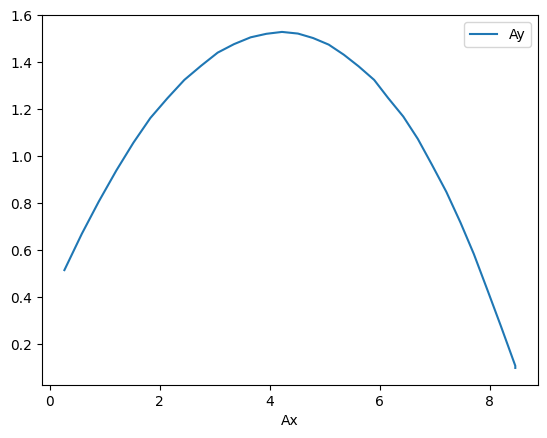

In [13]:
df.plot(x="Ax",y="Ay")

In [ ]:
df_x = df[['Ax','Bx','Cx','Dx','Ex','Fx','Gx','Hx','Ix','Jx','Kx','Lx','Mx','Nx','Ox','Px','Qx','Rx','Sx','Tx','Ux','Vx','Wx','Xx','Yx','Zx']].copy()


In [ ]:
df_xT = df_x.T
df_xT.plot.box(column=30,ylabel="x eindafstand(m)")
df_x_eind = df_xT[[30]].copy()
df_x_eind

In [ ]:
df_x_eind.plot.kde()